In [1]:
import os

cropped_path = "C://Users//anith//OneDrive//Desktop//Cropped"

for folder_name in os.listdir(cropped_path):
    folder_path = os.path.join(cropped_path, folder_name)
    
    if not os.path.isdir(folder_path):
        continue
    
    i = 1
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        
        if not os.path.isfile(file_path):
            continue
        
        # Get the file extension
        file_extension = os.path.splitext(file_name)[1]
        
        # Create the new file name
        new_file_name = f"{folder_name.lower().replace(' ', '')}{i}{file_extension}"
        new_file_path = os.path.join(folder_path, new_file_name)
        
        # Check if the new file name already exists
        while os.path.exists(new_file_path):
            i += 1
            new_file_name = f"{folder_name.lower().replace(' ', '')}{i}{file_extension}"
            new_file_path = os.path.join(folder_path, new_file_name)
        
        # Rename the file
        os.rename(file_path, new_file_path)
        
    

In [2]:
import os

cropped_path = "C://Users//anith//OneDrive//Desktop//Cropped"
celebrity_file_names_dict = {}

for img_dir in os.listdir(cropped_path):
    img_dir_path = os.path.join(cropped_path, img_dir)
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir_path):
        if entry.is_file():
            file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list

celebrity_file_names_dict

{'allu_arjun': ['C://Users//anith//OneDrive//Desktop//Cropped\\allu_arjun\\allu_arjun1.png',
  'C://Users//anith//OneDrive//Desktop//Cropped\\allu_arjun\\allu_arjun10.png',
  'C://Users//anith//OneDrive//Desktop//Cropped\\allu_arjun\\allu_arjun11.png',
  'C://Users//anith//OneDrive//Desktop//Cropped\\allu_arjun\\allu_arjun12.png',
  'C://Users//anith//OneDrive//Desktop//Cropped\\allu_arjun\\allu_arjun13.png',
  'C://Users//anith//OneDrive//Desktop//Cropped\\allu_arjun\\allu_arjun14.png',
  'C://Users//anith//OneDrive//Desktop//Cropped\\allu_arjun\\allu_arjun15.png',
  'C://Users//anith//OneDrive//Desktop//Cropped\\allu_arjun\\allu_arjun16.png',
  'C://Users//anith//OneDrive//Desktop//Cropped\\allu_arjun\\allu_arjun17.png',
  'C://Users//anith//OneDrive//Desktop//Cropped\\allu_arjun\\allu_arjun18.png',
  'C://Users//anith//OneDrive//Desktop//Cropped\\allu_arjun\\allu_arjun19.png',
  'C://Users//anith//OneDrive//Desktop//Cropped\\allu_arjun\\allu_arjun2.png',
  'C://Users//anith//OneDriv

In [3]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'allu_arjun': 0,
 'al_pacino': 1,
 'brad_pitt': 2,
 'bruce_lee': 3,
 'bruce_willis': 4,
 'cameron_diaz': 5,
 'catherine_zetajones': 6,
 'charlize_theron': 7,
 'christiano_ronaldo': 8,
 'christian_bale': 9,
 'chris_evans': 10,
 'chris_hemsworth': 11,
 'denzel_washington': 12,
 'dwayne_johnson': 13,
 'edward_norton': 14,
 'elizabeth_olsen': 15,
 'gerard_butler': 16,
 'guy_pearce': 17,
 'hugh_jackman': 18,
 'hugo_weaving': 19,
 'jake_gyllenhaal': 20,
 'jamie_foxx': 21,
 'jared_leto': 22,
 'jason_statham': 23,
 'jhonny_depp': 24,
 'katherine_heigl': 25,
 'keanu_reeves': 26,
 'keira_knightley': 27,
 'kevin_spacey': 28,
 'leonardo_dicaprio': 29,
 'mahesh_babu': 30,
 'mark_ruffalo': 31,
 'mark_wahlberg': 32,
 'megan_fox': 33,
 'meryl_streep': 34,
 'neymar_jr': 35,
 'nicolas_cage': 36,
 'novak_djokovic': 37,
 'ntr_jr': 38,
 'orlando_bloom': 39,
 'paul_walker': 40,
 'pawan_kalyan': 41,
 'prabhas_raju': 42,
 'rafael_nadal': 43,
 'robert_de_niro': 44,
 'robert_downey': 45,
 'russell_crowe': 46,


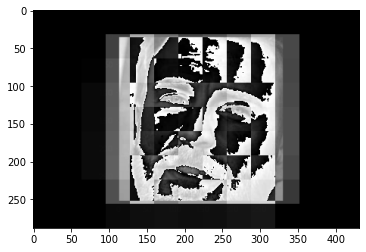

In [4]:
import numpy as np
import pywt
import cv2    
import matplotlib.pyplot as plt

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

cropped_img = cv2.imread("C://Users//anith//OneDrive//Desktop//Images//cropped_image.png")
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [5]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name]) 

In [6]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(6484, 4096)

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Reshape X into the correct format for a CNN
X_raw = X[:, :3072]  # First 3072 elements for the raw image
X_haar = X[:, 3072:]  # Next 1024 elements for the Haar image

# Reshape the raw image to (32, 32, 3) and the Haar image to (32, 32, 1)
X_raw_reshaped = X_raw.reshape(-1, 32, 32, 3)
X_haar_reshaped = X_haar.reshape(-1, 32, 32, 1)

# Stack the raw and Haar images to form a (32, 32, 4) image
X_reshaped = np.concatenate((X_raw_reshaped, X_haar_reshaped), axis=3)

# Check the shape
print("Shape of X_reshaped:", X_reshaped.shape)


# Normalize X
X_normalized = X_reshaped / 255.0

# Convert y to categorical if it's not already
y_categorical = to_categorical(y)

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X_normalized, y_categorical, test_size=0.2, random_state=42)

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 4)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(np.unique(y)))  # Number of classes based on unique labels in y
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val))

# Evaluate the model
val_loss, val_acc = model.evaluate(X_val, y_val)
print("Validation Loss: ", val_loss)
print("Validation Accuracy: ", val_acc)


Shape of X_reshaped: (6484, 32, 32, 4)
Epoch 1/25
163/163 [==============================] - 7s 32ms/step - loss: 3.9897 - accuracy: 0.0584 - val_loss: 3.8465 - val_accuracy: 0.0848
Epoch 2/25
163/163 [==============================] - 5s 30ms/step - loss: 3.6696 - accuracy: 0.1170 - val_loss: 3.4841 - val_accuracy: 0.1465
Epoch 3/25
163/163 [==============================] - 5s 30ms/step - loss: 3.2057 - accuracy: 0.1936 - val_loss: 3.0235 - val_accuracy: 0.2382
Epoch 4/25
163/163 [==============================] - 5s 30ms/step - loss: 2.7290 - accuracy: 0.2815 - val_loss: 2.6950 - val_accuracy: 0.3076
Epoch 5/25
163/163 [==============================] - 5s 30ms/step - loss: 2.3533 - accuracy: 0.3690 - val_loss: 2.4451 - val_accuracy: 0.3562
Epoch 6/25
163/163 [==============================] - 5s 30ms/step - loss: 2.0020 - accuracy: 0.4536 - val_loss: 2.2138 - val_accuracy: 0.4225
Epoch 7/25
163/163 [==============================] - 5s 31ms/step - loss: 1.7280 - accuracy: 0.5242 - 

In [9]:
# Reshape and normalize inputs
X_raw = X[:, :3072].reshape(-1, 32, 32, 3) / 255.0
X_haar = X[:, 3072:].reshape(-1, 32, 32, 1) / 255.0
X_combined = np.concatenate((X_raw, X_haar), axis=3)

# Convert labels to categorical
y_categorical = to_categorical(y)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_combined, y_categorical, test_size=0.2, random_state=42)

# Define the model
model1 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 4)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(np.unique(y)))
])

# Compile the model
model1.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Train the model
model1.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val))

# Evaluate the model
val_loss, val_acc = model1.evaluate(X_val, y_val)
print("Model 1 - Validation Loss:", val_loss)
print("Model 1 - Validation Accuracy:", val_acc)


Epoch 1/25
163/163 [==============================] - 8s 37ms/step - loss: 3.9764 - accuracy: 0.0546 - val_loss: 3.8615 - val_accuracy: 0.0956
Epoch 2/25
163/163 [==============================] - 6s 34ms/step - loss: 3.6296 - accuracy: 0.1178 - val_loss: 3.4392 - val_accuracy: 0.1480
Epoch 3/25
163/163 [==============================] - 6s 34ms/step - loss: 3.0924 - accuracy: 0.2163 - val_loss: 2.9484 - val_accuracy: 0.2467
Epoch 4/25
163/163 [==============================] - 5s 33ms/step - loss: 2.5487 - accuracy: 0.3245 - val_loss: 2.4576 - val_accuracy: 0.3454
Epoch 5/25
163/163 [==============================] - 6s 34ms/step - loss: 2.1685 - accuracy: 0.4228 - val_loss: 2.2936 - val_accuracy: 0.3909
Epoch 6/25
163/163 [==============================] - 5s 34ms/step - loss: 1.8247 - accuracy: 0.5018 - val_loss: 2.0673 - val_accuracy: 0.4503
Epoch 7/25
163/163 [==============================] - 6s 34ms/step - loss: 1.5436 - accuracy: 0.5687 - val_loss: 1.8621 - val_accuracy: 0.5019

In [10]:
# Define the model
model2 = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 4)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(np.unique(y)))
])

# Compile the model
model2.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Train the model
model2.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val))

# Evaluate the model
val_loss, val_acc = model2.evaluate(X_val, y_val)
print("Model 2 - Validation Loss:", val_loss)
print("Model 2 - Validation Accuracy:", val_acc)

Epoch 1/25
163/163 [==============================] - 12s 62ms/step - loss: 3.9755 - accuracy: 0.0536 - val_loss: 3.8470 - val_accuracy: 0.0918
Epoch 2/25
163/163 [==============================] - 10s 61ms/step - loss: 3.6520 - accuracy: 0.1180 - val_loss: 3.4352 - val_accuracy: 0.1473
Epoch 3/25
163/163 [==============================] - 10s 61ms/step - loss: 3.2019 - accuracy: 0.1922 - val_loss: 3.0549 - val_accuracy: 0.2236
Epoch 4/25
163/163 [==============================] - 10s 61ms/step - loss: 2.8373 - accuracy: 0.2580 - val_loss: 2.7174 - val_accuracy: 0.2791
Epoch 5/25
163/163 [==============================] - 10s 62ms/step - loss: 2.5038 - accuracy: 0.3179 - val_loss: 2.5373 - val_accuracy: 0.3207
Epoch 6/25
163/163 [==============================] - 10s 62ms/step - loss: 2.2697 - accuracy: 0.3779 - val_loss: 2.2200 - val_accuracy: 0.4040
Epoch 7/25
163/163 [==============================] - 10s 61ms/step - loss: 2.0044 - accuracy: 0.4531 - val_loss: 1.9725 - val_accuracy:

In [11]:
val_loss_model, val_acc_model = model.evaluate(X_val, y_val)
val_loss_model1, val_acc_model1 = model1.evaluate(X_val, y_val)
val_loss_model2, val_acc_model2 = model2.evaluate(X_val, y_val)

print(f"Model 1 - Validation Loss: {val_loss_model}, Validation Accuracy: {val_acc_model}")
print(f"Model 2 - Validation Loss: {val_loss_model1}, Validation Accuracy: {val_acc_model1}")
print(f"Model 3 - Validation Loss: {val_loss_model2}, Validation Accuracy: {val_acc_model2}")

best_acc = max(val_acc_model, val_acc_model1, val_acc_model2)
if best_acc == val_acc_model:
    print("Model 1 is the best model.")
elif best_acc == val_acc_model1:
    print("Model 2 is the best model.")
else:
    print("Model 3 is the best model.")

41/41 [==============================] - 1s 18ms/step - loss: 1.1449 - accuracy: 0.7155
Model 1 - Validation Loss: 2.1454594135284424, Validation Accuracy: 0.6592135429382324
Model 2 - Validation Loss: 2.2071611881256104, Validation Accuracy: 0.6198920607566833
Model 3 - Validation Loss: 1.1449317932128906, Validation Accuracy: 0.7154973149299622
Model 3 is the best model.


In [13]:
import pickle

CNN = model2
# Save the best classifier
with open('CNN_best.pkl', 'wb') as file:
    pickle.dump(model, file)